# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**




# Importações e Variáveis globais

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

global_1=0

#Funções tempo e geração vetor 


In [26]:
def tempo(algoritmo, arranjo):
  ini= time.time()
  aux=algoritmo(arranjo)
  fim = time.time()
  tempo_exec=fim-ini

  return tempo_exec, aux

def tempoQuickSort(algoritmo, arranjo):
  ini= time.time()
  comp = 0
  aux=algoritmo(arranjo,0,len(arranjo)-1,comp)
  fim = time.time()
  tempo_exec=fim-ini
  return tempo_exec, aux


def gerarVetorA(n_elementos):
    A=np.random.randint(0, 1000, (n_elementos))
    return A

def gerarVetorM(n_elementos):
    A = np.arange(0,(n_elementos),1)
    return A

def gerarVetorP(n_elementos):
    A = np.arange((n_elementos)-1,-1,-1)
    return A


# Funções de Ordenação




##  Insertion Sort


In [5]:
def insertionSort(arranjo):
  comp = 0
  for j in range(1,len(arranjo)):
    comp +=1
    chave = arranjo[j]
    i = j-1
    while i>=0 and arranjo[i]>chave:
      comp +=1
      arranjo[i+1] = arranjo[i]
      i=i-1
    arranjo[i+1] = chave
    comp +=1
  return comp


# Exemplo:
array = [6, 5, 12, 10, 9, 1]
print('Número de comparações')
print(insertionSort(array))
print('Vetor ordenado')
print(array)

Número de comparações
19
Vetor ordenado
[1, 5, 6, 9, 10, 12]


##  Merge Sort


In [6]:
def mergeSort(arranjo):
    comp =0
    if len(arranjo) > 1:
        meio = len(arranjo)//2
        vetorEsq = arranjo[:meio]
        vetorDir = arranjo[meio:]
        mergeSort(vetorEsq)
        mergeSort(vetorDir)
        i = j = k = 0
        
        while i < len(vetorEsq) and j < len(vetorDir):
            comp+=1
            if vetorEsq[i] < vetorDir[j]:
                arranjo[k] = vetorEsq[i]
                i += 1
            else:
                arranjo[k] = vetorDir[j]
                j += 1
            k += 1

        while i < len(vetorEsq):
            comp+=1
            arranjo[k] = vetorEsq[i]
            i += 1
            k += 1

        while j < len(vetorDir):
            comp+=1
            arranjo[k] = vetorDir[j]
            j += 1
            k += 1
    return comp


# Exemplo
array = [6, 5, 12, 10, 9, 1]
print('Número de comparações')
print(mergeSort(array))
print('Vetor ordenado')
print(array)
   

Número de comparações
6
Vetor ordenado
[1, 5, 6, 9, 10, 12]


##  Selection Sort


In [7]:
def selectionSort(arranjo): 
  comp = 0               
  for i in range(len(arranjo)): 
    comp+=1
    menor = i                               
    for j in range(i+1,len(arranjo)):  
      comp+=1     
      if arranjo[j]<arranjo[menor]:         
        menor = j
    comp+=1                           
    aux = arranjo[i]                        
    arranjo[i] = arranjo[menor]                
    arranjo[menor] = aux
  comp+=1
  return comp

# Exemplo
array = [6, 5, 12, 10, 9, 1]
print('Número de comparações')
print(selectionSort(array))
print('Vetor ordenado')
print(array)

Número de comparações
28
Vetor ordenado
[1, 5, 6, 9, 10, 12]


##  Bubble Sort


In [8]:
def bubbleSort(arranjo):
  comp = 0
  i = 1
  for i in range(len(arranjo)-1):
    comp +=1
    j = 1
    for j in range(len(arranjo)-1):
      comp+=1
      if arranjo[j] > arranjo[j+1]:
        aux = arranjo[j+1]
        arranjo[j+1]=arranjo[j]
        arranjo[j] = aux
    comp+=1
  comp+=1
  return comp


# Exemplo
array = [110,6, 5, 12, 10, 9, 1,100]
print('Número de comparações')
print(bubbleSort(array))
print('Vetor ordenado')
print(array)



Número de comparações
64
Vetor ordenado
[1, 5, 6, 9, 10, 12, 100, 110]


## Heap Sort

In [9]:
def heapify(arranjo,i,tam):
  esq = 2*i+1
  dir = 2*i+2
  maior = i
  
  if esq<tam and arranjo[esq]>arranjo[maior]:
    maior = esq

  if dir<tam and arranjo[dir]>arranjo[maior]:
    maior = dir

  if maior!=i:
    aux = arranjo[i]
    arranjo[i] = arranjo[maior]
    arranjo[maior] = aux

    heapify(arranjo,maior,tam)

def heapSort(arranjo):

  tam = len(arranjo)
  comp = 0
  for i in range(tam//2, -1, -1):
    comp+=1
    heapify(arranjo, i,tam)
  comp+=1
  for i in range(tam-1, 0, -1):
    comp+=1
    aux = arranjo[i] 
    arranjo[i] = arranjo[0]
    arranjo[0] = aux   
    heapify(arranjo, 0, i)
  comp+=1
  
   
  return comp;


# Exemplo
arranjo = [12,11,13,5,6,7]
print('Número de comparações')
print(heapSort(arranjo))
print('Vetor ordenado')
print(arranjo)

Número de comparações
11
Vetor ordenado
[5, 6, 7, 11, 12, 13]


## Quick Sort

> pivo = *A[A-comprimento]*

In [10]:
def partition(arranjo,p,r,comp):
  pivo = arranjo[r]
  i = p 
  comp+=1
  for j in range(p, r):
    comp+=1
    if arranjo[j]<=pivo:
      aux = arranjo[i]
      arranjo[i] = arranjo[j]
      arranjo[j] = aux
      i+=1
  comp+=1
      
  aux = arranjo[i]
  arranjo[i] = arranjo[r]
  arranjo[r] = aux
  return i,comp




def quickSort(arranjo,p,r,comp):
  if p < r:
    comp+=1
    q,comp = partition(arranjo,p,r,comp)
    quickSort(arranjo,p,q-1,comp)
    quickSort(arranjo,q+1,r,comp)
  comp+=1
  return comp



# Exemplos
arranjo = [2, 5, 6, 1, 4, 6, 2, 4, 7, 8]
comp =0
print('Número de comparações')
print(quickSort(arranjo,0, len(arranjo)-1,comp))
print('Vetor ordenado')
print(arranjo)
 
arranjo = [4, 5, 1, 2, 3]
comp =0
print('Número de comparações')
print(quickSort(arranjo,0, len(arranjo)-1,comp))
print('Vetor ordenado')
print(arranjo)




Número de comparações
13
Vetor ordenado
[1, 2, 2, 4, 4, 5, 6, 6, 7, 8]
Número de comparações
8
Vetor ordenado
[1, 2, 3, 4, 5]


# Comportamento assintótico

## Inserion Sort: melhor caso, pior caso e caso aleatório 

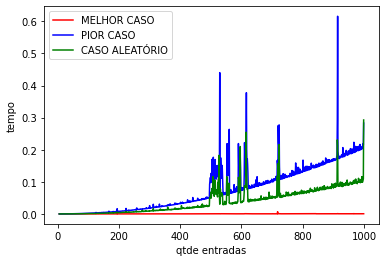

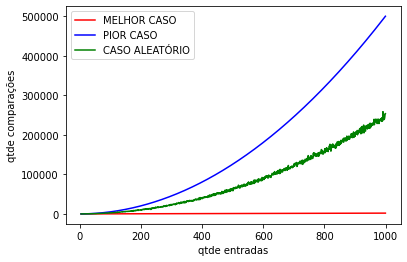

In [14]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []

for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempo(insertionSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempo(insertionSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempo(insertionSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 



### **Complexidade**


Pior caso: $O(n^2)$


Melhor caso: $𝛀(n)$

Caso médio para um arranjo  aleatório: $\Theta(n^2)$

Caso médio de arranjo "quase ordenado: $Θ(n) $

Para o melhor caso (arranjo ordenado) o comportamento assintótico é uma função linear de n. Na chamada da função, o while(arranjo[i] > chave), nunca será executado, e o array será percorrido apenas uma vez (n).<br>
O pior caso, (arranjo decrescentemente ordenado), o comportamento é uma função quadrática de n. Logo o algoritmo irá comparar cada elemento do arranjo com todos os elementos do arranjo inversamente ordenado, resultando em uma execução de n².<br> 
No caso médio, mesmo sendo tão ruim quanto o pior caso, ele é superiormente limitado pelo pior caso, não passando de uma função n². Podemos dizer que o *Insertion Sort* tem uma execucação de $Θ(n²)$.



## Merge Sort: melhor caso, pior caso e caso aleatório 

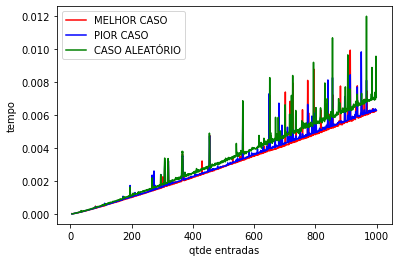

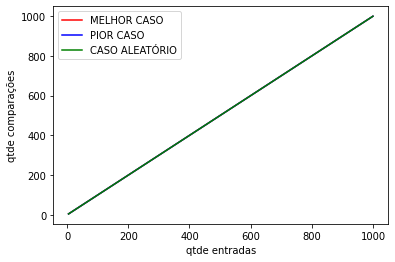

In [15]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempo(mergeSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempo(mergeSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempo(mergeSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 


### **Complexidade**

Pior caso: $Θ(n lg n)$

Melhor caso: $Θ(n lg n)$<br>
Podemos utilizar o "teorema mestre" para mostrar que T(n) é Θ(n lg n), onde lg n
significa $\log_2 n$. Como a função logarítmica cresce mais lentamente do que qualquer função linear, para entradas
suficientemente grandes, o desempenho da ordenação por intercalação, com seu tempo de execução $Θ(n lg n)$, supera
o da ordenação por inserção, cujo tempo de execução é $Θ(n^2)$, no pior caso.

## Selection Sort: melhor caso, pior caso e caso aleatório 

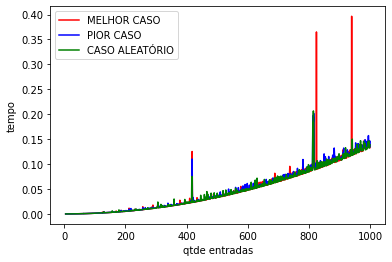

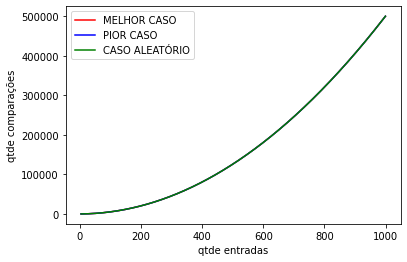

In [16]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempo(selectionSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempo(selectionSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempo(selectionSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 


### **Complexidade**


Pior caso: $O(n^2)$

Melhor caso:  $𝛀(n^2)$

Caso aleatório: $Θ(n^2)$

O laço duplo aninhado no método selection deixa evidente que o algoritmo é O(n2). Para o melhor caso (já ordenado) podemos expressar o tempo de execução como uma função linear de n, enquanto no pior (inversamente ordenado) caso é um função quadrática de n. Sendo assim, podemos dizer que a taxa de crescimento desse algoritmo é $Θ(n^2)$.

## Bubble Sort: melhor caso, pior caso e caso aleatório 

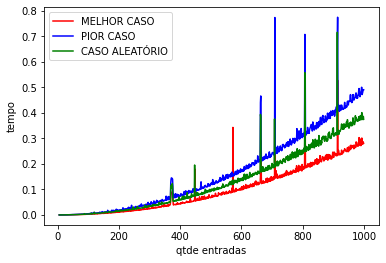

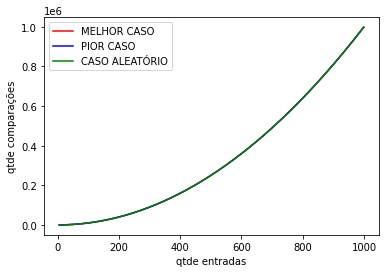

In [17]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempo(bubbleSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempo(bubbleSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempo(bubbleSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 

### Complexidade


Pior caso: $O(n^2)$

Melhor caso: $Ω(n)$

Caso aleatório: $Θ(n^2)$

O melhor caso ocorre com o arranjo ordenado, nesse caso sua complexidade é $Ω(n)$. O pior caso ocorre no arranjo decrescentemente ordenado, assim o algoritmo sempre efetuará as trocas de elementos no arranjo. Logo, sua complexidade no pior caso será $O(n^2)$.

## Heap Sort: melhor caso, pior caso e caso aleatório 

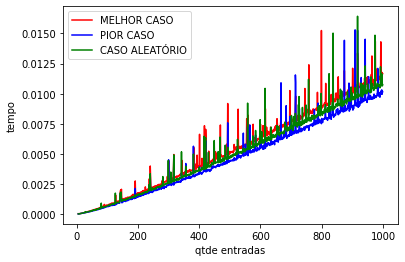

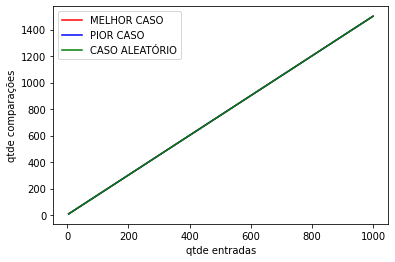

In [18]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempo(heapSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempo(heapSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempo(heapSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 

### Complexidade

Pior caso: $O(n lg n)$

Melhor caso: $𝛀(n log(n))$

Caso aleatório: $Θ(n lg n)$
O procedimento HEAPSORT demora o tempo O(n lg n), já que a chamada a BUILD-MAX-HEAP demora o tempo $O(n)$, e
cada uma das n – 1 chamadas a MAX-HEAPIFY demora o tempo $O(lg n)$.

## Quick Sort:  melhor caso, pior caso e caso aleatório 

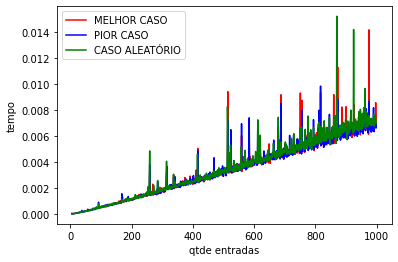

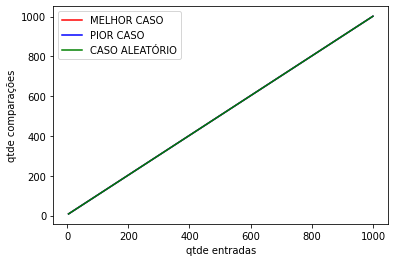

In [33]:
auxTempoMelhor = []
auxTempoPior = []
auxTempoAleatorio = []

auxCompMelhor = []
auxCompPior = []
auxCompAleatorio = []

temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempoQuickSort(quickSort, gerarVetorM(i)))
  auxTempoMelhor.append(aux[0])
  auxCompMelhor.append(aux[1])

  aux = (tempoQuickSort(quickSort, gerarVetorP(i)))
  auxTempoPior.append(aux[0])
  auxCompPior.append(aux[1])

  aux = (tempoQuickSort(quickSort, gerarVetorA(i)))
  auxTempoAleatorio.append(aux[0])
  auxCompAleatorio.append(aux[1])

 
plt.plot(numEntradas,auxTempoMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxTempoPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxTempoAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompMelhor, 'r', label='MELHOR CASO')
plt.plot(numEntradas,auxCompPior, 'b', label='PIOR CASO')
plt.plot(numEntradas,auxCompAleatorio, 'g', label='CASO ALEATÓRIO')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 

### Complexidade

Pior caso: $O(n^2)$ <br>
Caso médio: $O(n log n)$ <br>
Melhor caso: $Ω(n lg n)$<br>
O melhor caso do Quicksort ocorre quando as partições são balanceadas, isto é, cada partição com n/2 elementos. Pelo teorema mestre, podemos obter a solução tal como $Ω(n lg n)$. Ja no pior caso, é quando as chamadas recursivas produzem partições com 0 e n-1 elementos. A partição de tamanho zero fica à direita ou esquerda do pivô dependendo do valor. Nas versões de Hoare e Cormen, esse caso patológico ocorre no arranjo crescente ou decrescentemente ordenado, nesses casos, a complexidade é de $O(n^2)$, que é a mesma do _Bubble Sort, Insertion Sort_ e _Selection Sort_. Em casos médios, sua complexidade de $O(nlogn)$, que é aonde o algoritmo tem seu ponto forte, sendo essa medida uma estastísca, ou seja, executa-se o Quick Sort esperando que ocorra um caso médio para valer essa complexidade.

# Caso aleatório - Comparação dos algoritmos

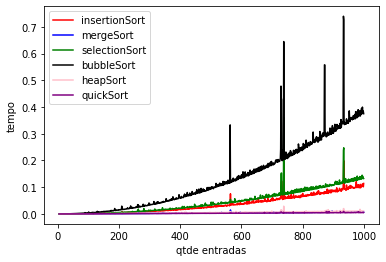

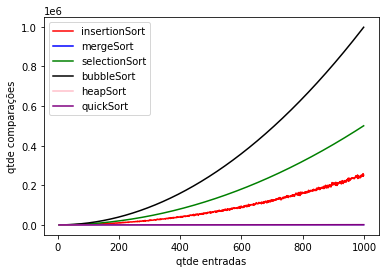

In [27]:
auxTempoInsertion = []
auxTempoMerge = []
auxTempoSelect = []
auxTempoBubble = []
auxTempoHeap = []
auxTempoQuick = []


auxCompInsertion = []
auxCompMerge = []
auxCompSelection = []
auxCompBubble = []
auxCompHeap = []
auxCompQuick = []



temp = []
comp = []
aux = 0

numEntradas = []


for i in range (5, 1000):

  numEntradas.append(i);
  aux = (tempo(insertionSort, gerarVetorA(i)))
  auxTempoInsertion.append(aux[0])
  auxCompInsertion.append(aux[1])


  aux = (tempo(mergeSort, gerarVetorA(i)))
  auxTempoMerge.append(aux[0])
  auxCompMerge.append(aux[1])

  aux = (tempo(selectionSort, gerarVetorA(i)))
  auxTempoSelect.append(aux[0])
  auxCompSelection.append(aux[1])

  aux = (tempo(bubbleSort, gerarVetorA(i)))
  auxTempoBubble.append(aux[0])
  auxCompBubble.append(aux[1])

  aux = (tempo(heapSort, gerarVetorA(i)))
  auxTempoHeap.append(aux[0])
  auxCompHeap.append(aux[1])

  aux = (tempoQuickSort(quickSort, gerarVetorA(i)))
  auxTempoQuick.append(aux[0])
  auxCompQuick.append(aux[1])




plt.plot(numEntradas,auxTempoInsertion, 'r', label='insertionSort')
plt.plot(numEntradas,auxTempoMerge, 'b', label='mergeSort')
plt.plot(numEntradas,auxTempoSelect, 'g', label='selectionSort')
plt.plot(numEntradas,auxTempoBubble, 'black', label='bubbleSort')
plt.plot(numEntradas,auxTempoHeap, 'pink', label='heapSort')
plt.plot(numEntradas,auxTempoQuick, 'purple', label='quickSort')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()


plt.plot(numEntradas,auxCompInsertion, 'r', label='insertionSort')
plt.plot(numEntradas,auxCompMerge, 'b', label='mergeSort')
plt.plot(numEntradas,auxCompSelection, 'g', label='selectionSort')
plt.plot(numEntradas,auxCompBubble, 'black', label='bubbleSort')
plt.plot(numEntradas,auxCompHeap, 'pink', label='heapSort')
plt.plot(numEntradas,auxCompQuick, 'purple', label='quickSort')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 


# Questão 2 - Resolução

## Quick Sort com Pivô aleatório 

In [28]:
def partition(arranjo,p,r,comp):

  pivo = arranjo[np.random.randint(p, r)]
  i = p
  comp+=1 
  for j in range(p, r):
    comp+=1
    if arranjo[j]<=pivo:
      aux = arranjo[i]
      arranjo[i] = arranjo[j]
      arranjo[j] = aux
      i+=1
  comp+=1
      

  aux = arranjo[i]
  arranjo[i] = arranjo[r]
  arranjo[r] = aux
  return i, comp




def quickSortAletorio(arranjo,p,r,comp):
  if p < r:
    comp+=1
    q, comp = partition(arranjo,p,r,comp)
    quickSortAletorio(arranjo,p,q-1,comp)
    quickSortAletorio(arranjo,q+1,r,comp)
  return comp





### Comparações 

MELHOR CASO


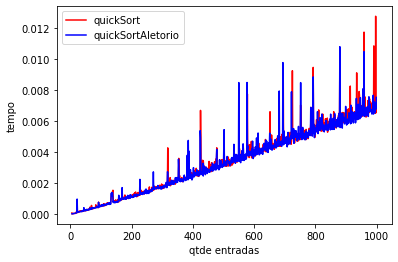

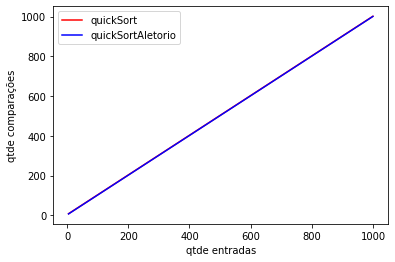

In [30]:
auxTempoQuick = []
auxTempoQuickAleatorio = []


auxCompQuick = []
auxCompQuickAleatorio = []


temp = []
comp = []
aux = 0

numEntradas = []

print('MELHOR CASO')
for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempoQuickSort(quickSort, gerarVetorM(i)))
  auxTempoQuick.append(aux[0])
  auxCompQuick.append(aux[1])

  aux = (tempoQuickSort(quickSortAletorio, gerarVetorM(i)))
  auxTempoQuickAleatorio.append(aux[0])
  auxCompQuickAleatorio.append(aux[1])
 
plt.plot(numEntradas,auxTempoQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxTempoQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxCompQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 


CASO PIOR


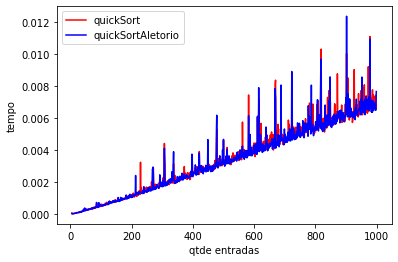

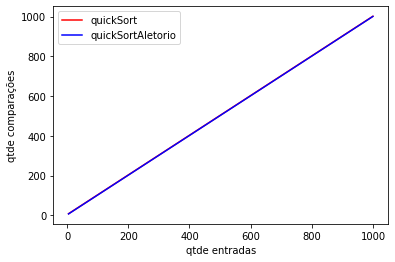

In [31]:
auxTempoQuick = []
auxTempoQuickAleatorio = []


auxCompQuick = []
auxCompQuickAleatorio = []


temp = []
comp = []
aux = 0

numEntradas = []

print('CASO PIOR')
for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempoQuickSort(quickSort, gerarVetorP(i)))
  auxTempoQuick.append(aux[0])
  auxCompQuick.append(aux[1])

  aux = (tempoQuickSort(quickSortAletorio, gerarVetorP(i)))
  auxTempoQuickAleatorio.append(aux[0])
  auxCompQuickAleatorio.append(aux[1])
 
plt.plot(numEntradas,auxTempoQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxTempoQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 

print()

plt.plot(numEntradas,auxCompQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxCompQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 

CASO ALEATóRIO


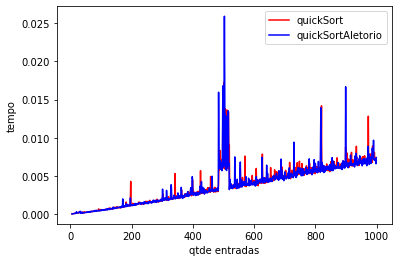

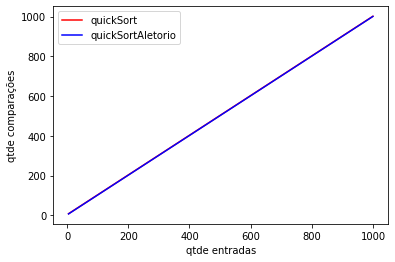

In [32]:
auxTempoQuick = []
auxTempoQuickAleatorio = []


auxCompQuick = []
auxCompQuickAleatorio = []


temp = []
comp = []
aux = 0

numEntradas = []

print('CASO ALEATóRIO')
for i in range (5, 1000):
  numEntradas.append(i);

  aux = (tempoQuickSort(quickSort, gerarVetorA(i)))
  auxTempoQuick.append(aux[0])
  auxCompQuick.append(aux[1])

  aux = (tempoQuickSort(quickSortAletorio, gerarVetorA(i)))
  auxTempoQuickAleatorio.append(aux[0])
  auxCompQuickAleatorio.append(aux[1])
 
plt.plot(numEntradas,auxTempoQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxTempoQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("tempo")
plt.legend()
plt.show() 
print()

plt.plot(numEntradas,auxCompQuick, 'r', label='quickSort')
plt.plot(numEntradas,auxCompQuickAleatorio, 'b', label='quickSortAletorio')
plt.xlabel("qtde entradas")
plt.ylabel("qtde comparações")
plt.legend()
plt.show() 